In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def lr_schadule(t, a=1, b=1000):
    return a/(b+t)

def linear_predict(X, w):
    return X@w

def mse_loss(y_hat, y):
    error = y_hat-y
    loss = (2*np.sum(error*error))/y.shape[0]
    return error, loss

def calc_gradient(X, error):
    return X.T@error

def update_weights(w, lr, gradient):
    return w-(lr*gradient)

def SGD(X, y, w, lr, n_epochs):
    losses = []
    W = []
    m = len(X)
    for epoch in range(n_epochs):
        for iteration in range(m):
            idx = np.random.randint(0,m)
            xi = X[idx].reshape(1,-1)
            yi = y[idx].reshape(1,-1)
            y_hat = linear_predict(xi, w)
            error, loss = mse_loss(y_hat, yi)
            gradient = calc_gradient(xi, error)
            lr = lr_schadule(epoch*iteration)
        W.append([w[0][0],w[1][0]])
        losses.append(loss)
        w = update_weights(w, lr, gradient)
    return losses, W


In [119]:
np.random.seed(7)
x = np.random.randint(0,50,(10,1))
x0 = np.ones_like(x)
X = np.concatenate((x0,x), axis=1)
y = np.random.randint(0,10,(10,1))
w= np.random.rand(X.shape[1],1)
n_epochs = 100
lr = 0.001

In [120]:
losses, W = SGD(X, y, w, lr, n_epochs)
W = np.array(W)

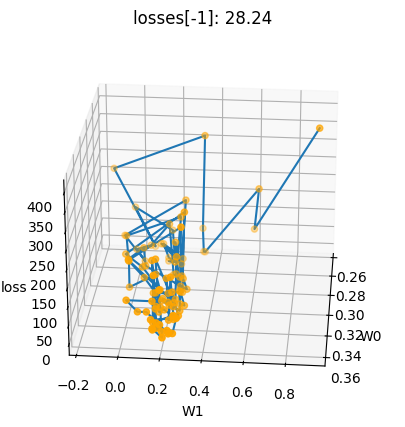

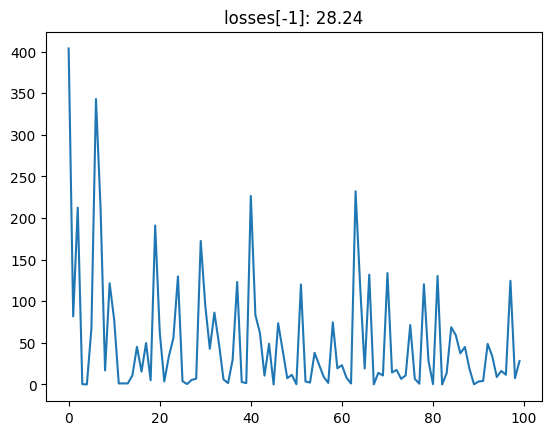

In [121]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d', elev=25, azim=5)
ax.scatter3D(W[:,0], W[:,1], losses, color='orange')
ax.plot(W[:,0], W[:,1], losses)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('loss')
plt.title(f'losses[-1]: {losses[-1]:.2f}')
plt.show()

plt.plot(losses)
plt.title(f'losses[-1]: {losses[-1]:.2f}')
plt.show()